In [2]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importacion de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#Carga del dataset y visualización
data1 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Final/Tarea 5/Titanic-Dataset.csv")
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Explorar las primeras filas y la información de cada dataset
print(data1.head())
print(data1.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [7]:
# Resumen estadístico
print("\nResumen estadístico del dataset:")
display(data1.describe())


Resumen estadístico del dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Visualizar valores faltantes
print("\nValores faltantes en cada columna:")
display(data1.isnull().sum())


Valores faltantes en cada columna:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Organizar valores faltantes de los campos Age, Cabin y Embarked
# Calcular la cantidad de valores faltantes por columna
missing_values = data1.isnull().sum()

# Filtrar solo las columnas con valores faltantes
missing_values = missing_values[missing_values > 0]

# Ordenar los valores faltantes en orden descendente
missing_values = missing_values.sort_values(ascending=False)

# Mostrar los resultados
print("\nValores faltantes organizados por columna:")
display(missing_values)


Valores faltantes organizados por columna:


Cabin       687
Age         177
Embarked      2
dtype: int64

In [11]:
# Filtrar las columnas específicas
selected_columns = ['Age', 'Cabin', 'Embarked']

# Calcular los valores faltantes solo para esas columnas
missing_values = data1[selected_columns].isnull().sum()

# Ordenar los valores faltantes en orden descendente
missing_values = missing_values.sort_values(ascending=False)

# Mostrar los resultados
print("\nValores faltantes organizados por las columnas seleccionadas:")
display(missing_values)


Valores faltantes organizados por las columnas seleccionadas:


Cabin       687
Age         177
Embarked      2
dtype: int64

In [13]:
# Reemplazar valores faltantes en Age con 255
data1['Age'] = data1['Age'].fillna(255)

# Reemplazar valores faltantes en Cabin con la palabra 'null'
data1['Cabin'] = data1['Cabin'].fillna('null')

# Reemplazar valores faltantes en Embarked con la palabra 'null'
data1['Embarked'] = data1['Embarked'].fillna('null')

# Verificar si los valores faltantes han sido reemplazados
print("\nValores faltantes después de la imputación:")
display(data1.isnull().sum())

# Mostrar las primeras filas para confirmar los cambios
print("\nPrimeras filas después de la imputación:")
display(data1.head())


Valores faltantes después de la imputación:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Primeras filas después de la imputación:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,null,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,null,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,null,S


In [5]:
#Importacion de bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Carga del dataset y visualización
data1 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Final/Tarea 5/Titanic-Dataset.csv")

# Codificar variables categóricas
label_encoder = LabelEncoder()
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])  # 'Sex': Male=1, Female=0
data1['Embarked'] = label_encoder.fit_transform(data1['Embarked'])  # 'Embarked': A=0, B=1, etc.

# Eliminar columnas no relevantes como Name, Ticket, y Cabin
data1 = data1.drop(['Name', 'Ticket', 'Cabin'], axis=1)


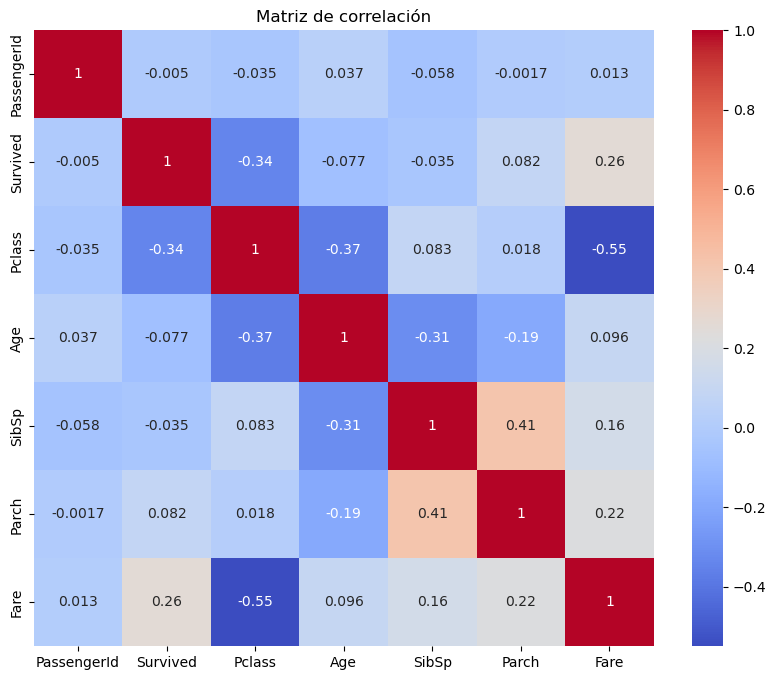

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
data1 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Final/Tarea 5/Titanic-Dataset.csv")

# Codificar variables categóricas
label_encoder = LabelEncoder()
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])
data1['Embarked'] = label_encoder.fit_transform(data1['Embarked'].fillna('Unknown'))  # Manejar valores faltantes

# Filtrar columnas numéricas
numeric_data = data1.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()



In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Diagnóstico de valores faltantes
missing_values = X.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Selección de características
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y)

# Obtener columnas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Valores faltantes por columna:
Age    177
dtype: int64
Características seleccionadas: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')


Sex            0.248979
PassengerId    0.192274
Fare           0.191649
Age            0.179005
Pclass         0.080923
SibSp          0.043298
Embarked       0.032800
Parch          0.031072
dtype: float64


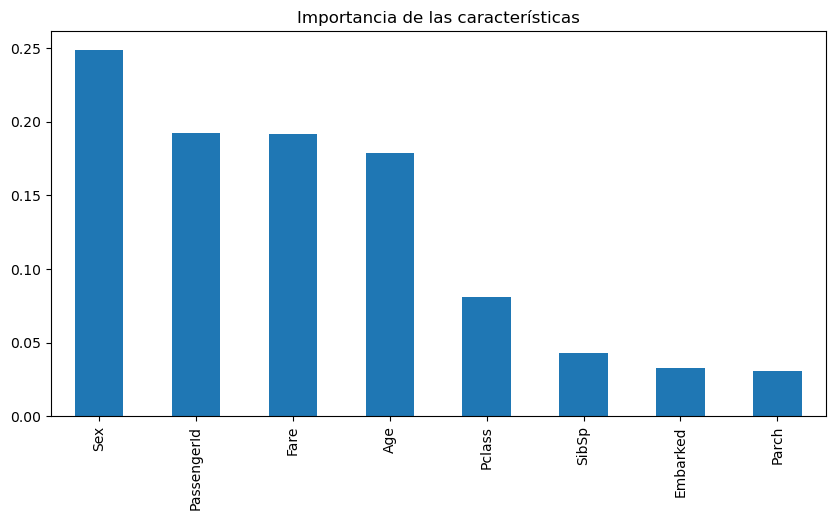

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtener importancia de características
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

# Visualizar importancia
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Importancia de las características")
plt.show()

In [11]:
# Selección final de características
X_final = data1[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = data1['Survived']


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Crear el modelo base
model = RandomForestClassifier(random_state=42)

# Definición de los hiperparámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],        # Número de árboles
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # Número mínimo de muestras necesarias en una hoja
    'bootstrap': [True, False]            
}

# Configuración de la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajuste del modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros encontrados
best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

# Evaluación del modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Precisión en el conjunto de prueba: 0.78

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       157
           1       0.79      0.65      0.71       111

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [14]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=100, cv=5, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Mejor modelo y evaluación
best_model = random_search.best_estimator_
print("Mejores parámetros (búsqueda aleatoria):", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros (búsqueda aleatoria): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}


Precisión (Accuracy): 0.78

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       157
           1       0.79      0.65      0.71       111

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



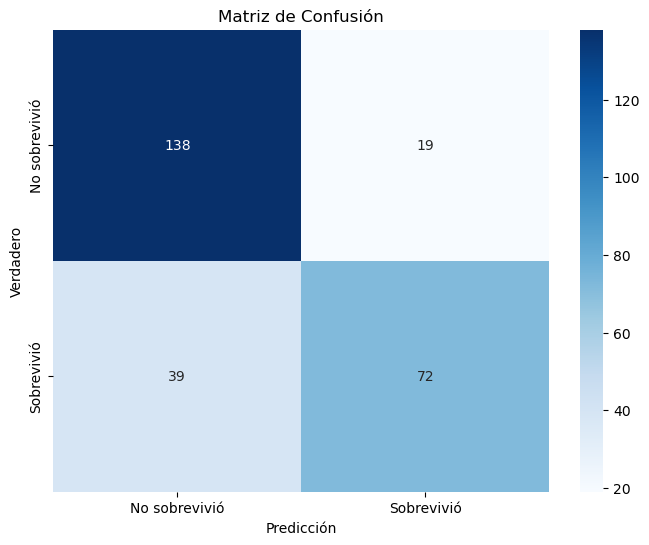

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.2f}")

# Generar reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


In [4]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
data1 = pd.read_csv("D:/Bibliotecas/Documentos/UNAD/16 04 2024/Analisis de Datos/Momento Final/Tarea 5/Titanic-Dataset.csv")

# Llenar valores faltantes sin inplace=True
data1['Age'] = data1['Age'].fillna(data1['Age'].median())
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])


data1 = pd.get_dummies(data1, columns=['Sex', 'Embarked'], drop_first=True)

# Separar características y variable objetivo
X = data1.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data1['Survived']

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Predicción
y_pred = best_model.predict(X_test)

# Evaluar el desempeño con el Recall
from sklearn.metrics import recall_score, classification_report
recall = recall_score(y_test, y_pred)
print(f"Recall (Clase Positiva): {recall:.2f}")

# Reporte de clasificación completo
print("\nReporte Completo de Clasificación:")
print(classification_report(y_test, y_pred))



Recall (Clase Positiva): 0.74

Reporte Completo de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



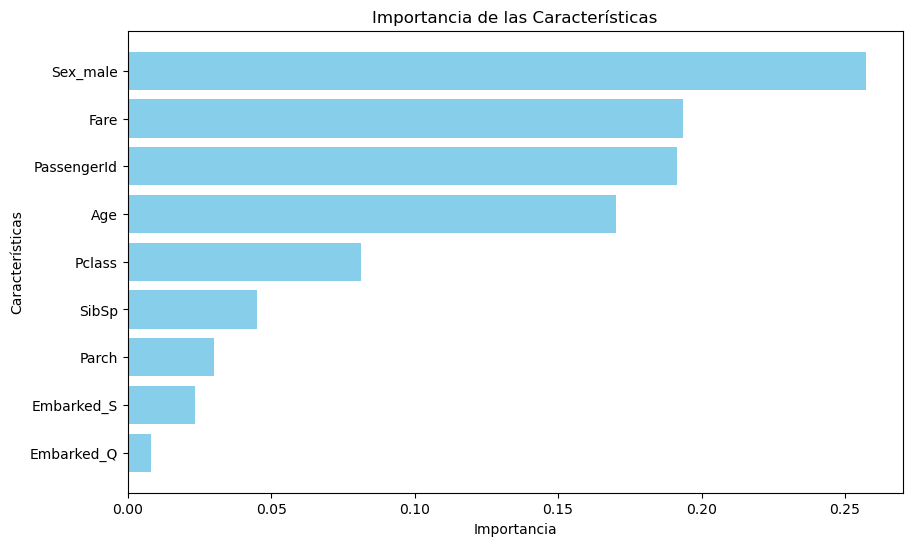

In [6]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importances = best_model.feature_importances_
features = X_train.columns

# Ordenar las características por importancia
indices = importances.argsort()[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()


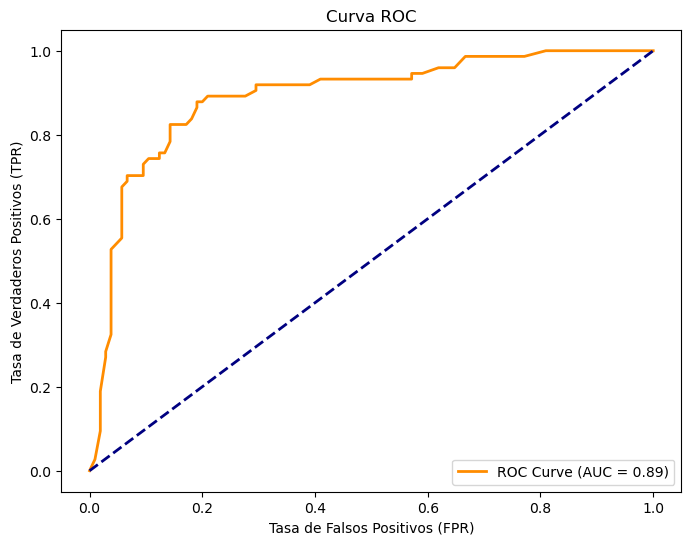

In [7]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


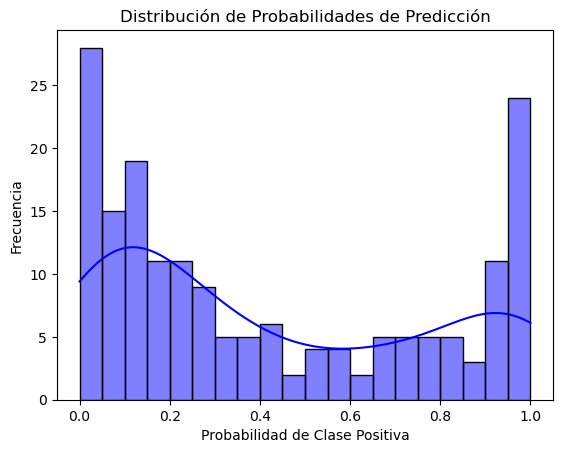

In [8]:
import seaborn as sns

# Distribución de probabilidades de predicción
sns.histplot(y_prob, bins=20, kde=True, color='blue')
plt.title('Distribución de Probabilidades de Predicción')
plt.xlabel('Probabilidad de Clase Positiva')
plt.ylabel('Frecuencia')
plt.show()


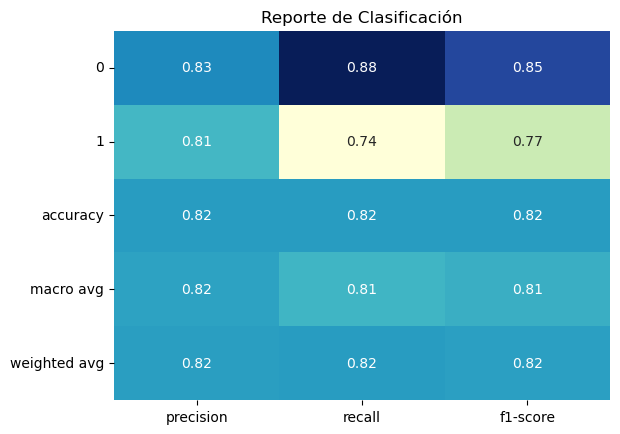

In [9]:
from sklearn.metrics import classification_report
import pandas as pd

# Creación del reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Conversión de DataFrame y generación de gráfico
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Excluir "accuracy"
sns.heatmap(report_df, annot=True, cmap="YlGnBu", cbar=False, fmt=".2f")
plt.title("Reporte de Clasificación")
plt.show()
